In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

In [2]:
df = pd.read_csv("../../../Data/B4.csv",encoding='latin-1',low_memory=False)

In [3]:
def get_day_into_year(date):
    day_into_year = date.timetuple().tm_yday
    return day_into_year
df["ResolvedDate"] = pd.to_datetime(df["ResolvedDate"])
df["ResolvedDate_Days_into_year"] = df["ResolvedDate"].apply(lambda x: int(get_day_into_year(x)))
df["Created_On"] = pd.to_datetime(df["Created_On"])
df["Created_on_Days_into_year"] = df["Created_On"].apply(lambda x: int(get_day_into_year(x)))

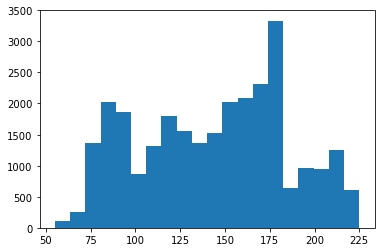

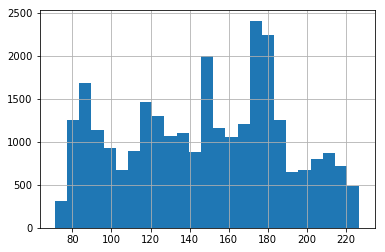

In [18]:
df["Created_on_Days_into_year"].hist(bins=180)
# plt.xlim(35, 175)
plt.show()

df["ResolvedDate_Days_into_year"].hist(bins=180)
# plt.xlim(35, 175)
plt.show()

df["Created_on_Days_into_year"].hist(bins=20)
# plt.xlim(35, 175)
plt.grid()
plt.show()

df["ResolvedDate_Days_into_year"].hist(bins=25)
# plt.xlim(35, 175)
plt.show()

In [64]:
df["Created_On"][df["Created_on_Days_into_year"] == 240].head()

Series([], Name: Created_On, dtype: datetime64[ns])

In [85]:
days = [0,31,28,31,30,31,30,31,31]
x = 1
for day in days:
    x+=day
    print(x)

1
32
60
91
121
152
182
213
244


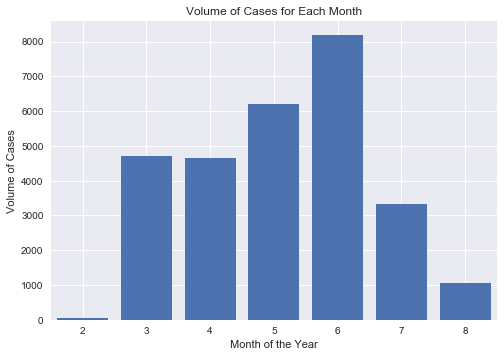

In [156]:
import seaborn as sns
months = [31, 60, 91, 121, 152, 182, 213, 244]
x = 0
month_list = []
VolumePerMonth = []
for i, month in enumerate(months):
    y= month
    month_list.append(i+1)
    VolumePerMonth.append(len(df["Created_on_Days_into_year"][(df["Created_on_Days_into_year"] > x) & (df["Created_on_Days_into_year"] <= y) ]))
    
    x = month
    y = x + month

    
ax = plt.bar(month_list, VolumePerMonth)

rects = ax.patches

# Now make some labels
labels = ["label%d" % i for i in range(len(rects))]

plt.xlim(1.5,8.5)
plt.ylabel("Volume of Cases")
plt.xlabel("Month of the Year")
plt.title("Volume of Cases for Each Month")

# plt.grid(True, which='minor')
# ax = plt.gca()
# ax.yaxis.grid(True)#, which='minor') 
# # ax.xaxis.grid(False, which='minor')

want to show volume against month

If cases don't get created or resolved on weekends, then we would expect the time taken to be larger if a case was created on weekend.

So, counting from monday, as the day of the week gets larger we would expect the time taken to be larger?

Or, have a marker for whether the case was created on the weekend!

In [158]:
def get_last_bdays_months_just_date():
    last_bdays = pd.date_range("2017.01.01", periods=11, freq='BM')
    last_bdays_offset = []
    for last_bday in last_bdays:
        last_bdays_offset.append((last_bday + pd.DateOffset(days=1,hours=8)).date())
    return last_bdays_offset

def created_on_weekend(date, last_bdays):
    day_of_the_week = date.weekday()
    if day_of_the_week == 0 or day_of_the_week == 6:
        # but have to check if the date is the day after last business day of the month!
        if date.date in last_bdays and date.time()<8:
            return 0
        else:
            return 1
    else:
        return 0
last_bdays = get_last_bdays_months_just_date()
df["Created_On"] = pd.to_datetime(df["Created_On"])
df["Created_on_weekend"] = df["Created_On"].apply(lambda x: int(created_on_weekend(x, last_bdays)))

In [161]:
df["TimeTaken"] /= 3600

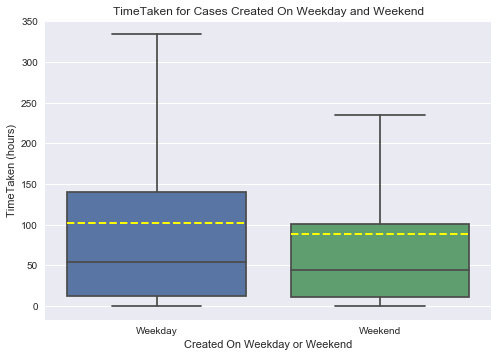

In [180]:
import seaborn 
meanstuff = dict(color="yellow", linewidth=2)
seaborn.boxplot(df["Created_on_weekend"], df["TimeTaken"], showfliers=False, showmeans=True, meanline=True, meanprops=meanstuff)
plt.title("TimeTaken for Cases Created On Weekday and Weekend")
plt.xlabel("Created On Weekday or Weekend")
plt.ylabel("TimeTaken (hours)")
xticks = ["Weekday", "Weekend"]
plt.xticks([x for x in range(len(xticks))], xticks)
plt.show()

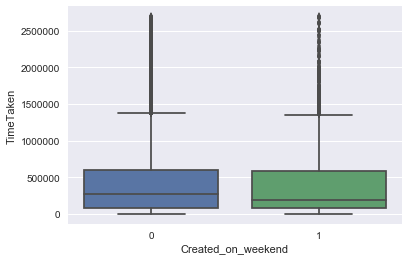

In [70]:
import seaborn 
seaborn.boxplot(df["Created_on_weekend"], df["TimeTaken"])
plt.show()